In [1]:
import time, enum, math
from collections import defaultdict
from typing import Tuple

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from functions_networks_jose import network_stats, find_parameters_density, factorize, initial_values_optimization_factorial_networks, optimize_smallworld, optimize_barabassi

In [2]:
number_nodes=720 #5imp, 20, 10 range. n=120, t=30s, density range=1-0.027, n=240, t=140s, density range=+-0.02, n=720, t=1700s, density range=+-0.016
objective_density_u=0.15 #based on dumbells number
implementations_u=10 #how many graphs we analyze per "ephoch"
p_stochaisc_smallworld=0.05 #extra parameter small world, changes clustering coeff but not density. higher=less clustering.
edges_barabassi=0.5 #percentage of connections that the elite have. higher=more clustering (from 0.5 on, before it seems to be flat)
range_barabassi_p_u=20 #parameter space for finding optimal in barabassi num1. higuer=closer to objective density
range_barabassi_anisotropy_u=10 #parameter space for finding optimal in barabassi num2. higuer=closer to objective density

parameters caveman 6 120 parameters windmill 6 121 parameters small world 720 120 0.05 parameters barabassi 720 90 360 0.9499999999999998


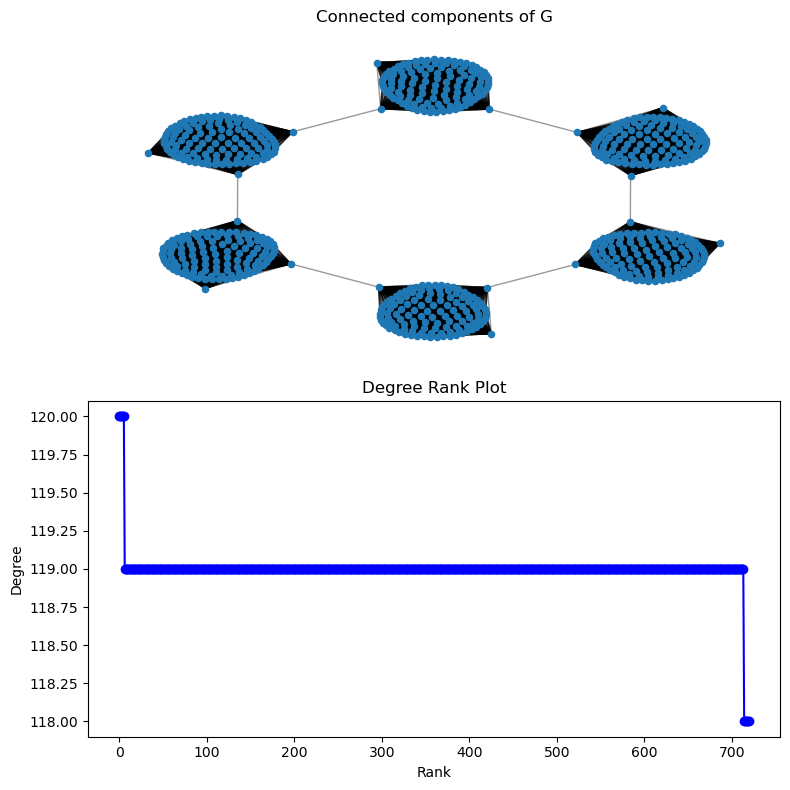

density 0.16550764951321278 clustering coeff 0.999581018848218


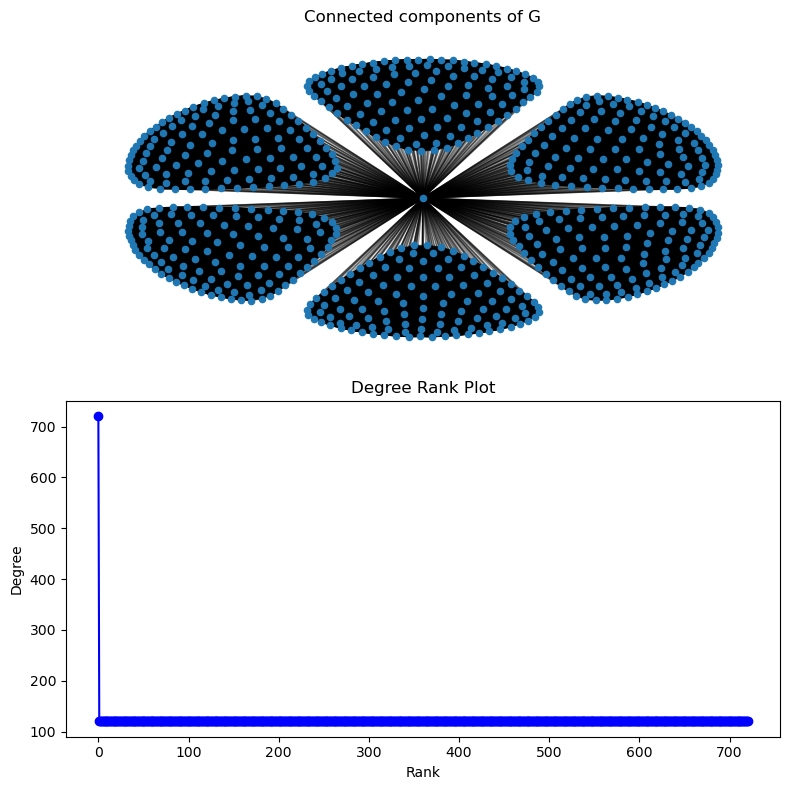

density 0.1678224687933426 clustering coeff 0.9988425903599351


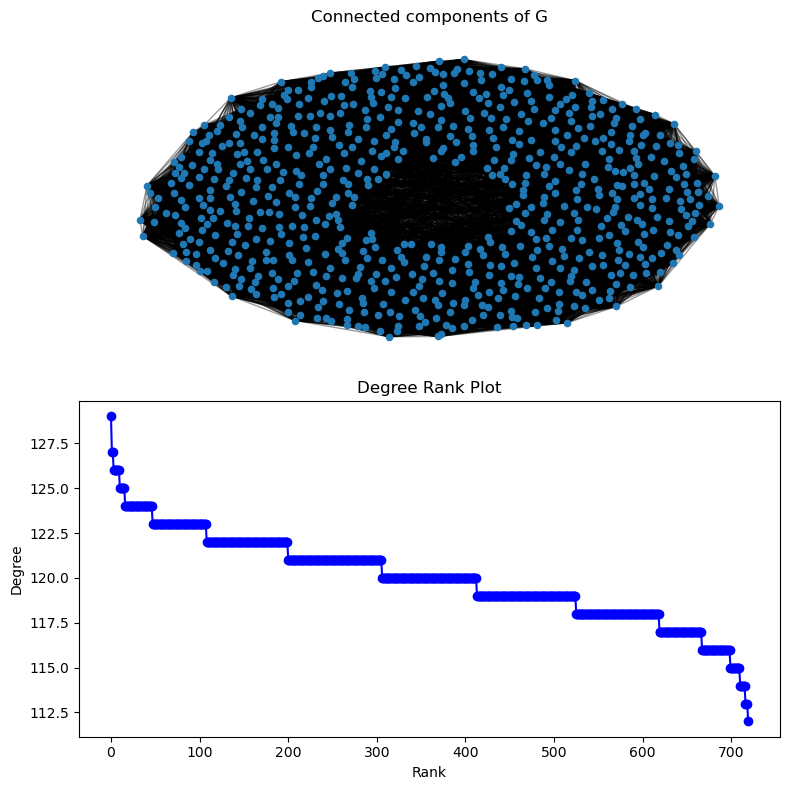

density 0.16689847009735745 clustering coeff 0.645443267140724


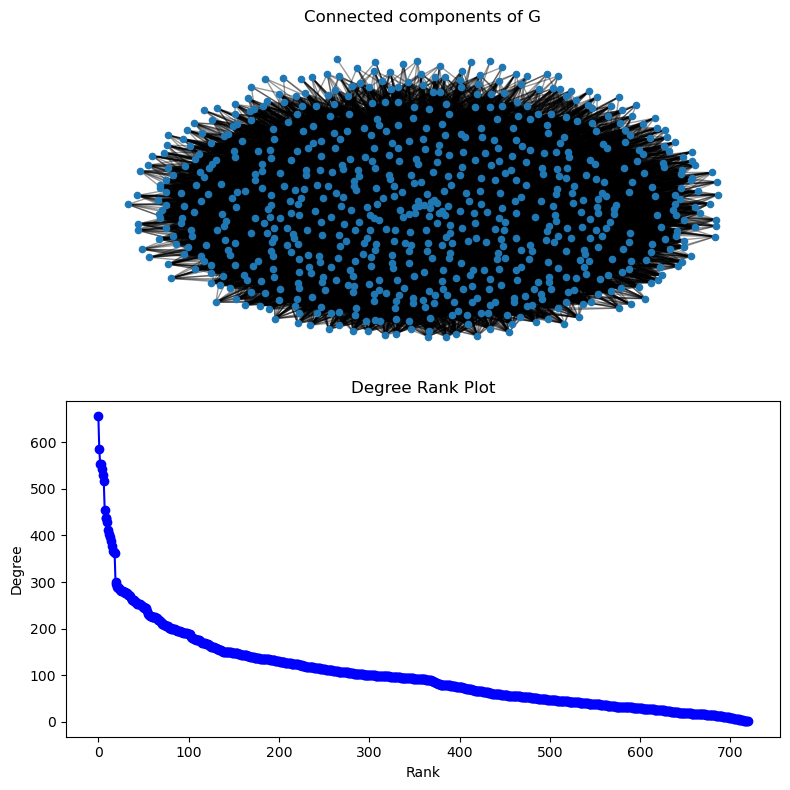

density 0.1449930458970793 clustering coeff 0.47950438540212303


(None, None)

In [3]:
n=number_nodes
objective_density=objective_density_u
implementations=implementations_u
range_barabassi_p=range_barabassi_p_u  
range_barabassi_anisotropy=range_barabassi_anisotropy_u
[l_caveman, k_caveman, l_windmill, k_windmill, k_smallworld, k_barabassi, l_barabassi, p_barabassi]=find_parameters_density(n,p_stochaisc_smallworld,edges_barabassi, range_barabassi_anisotropy, range_barabassi_p, implementations, objective_density)
print("parameters caveman", l_caveman, k_caveman, "parameters windmill", l_windmill, k_windmill,"parameters small world", n, k_smallworld, p_stochaisc_smallworld, "parameters barabassi", n, k_barabassi, l_barabassi, p_barabassi)
graph = nx.connected_caveman_graph(l_caveman,k_caveman)
network_stats(graph)
graph = nx.windmill_graph(l_windmill,k_windmill)
network_stats(graph)
graph = nx.watts_strogatz_graph(n,k_smallworld, p_stochaisc_smallworld)
network_stats(graph)
graph = nx.dual_barabasi_albert_graph(n,k_barabassi, l_barabassi, p_barabassi)
network_stats(graph)